**EXPLORATORY DATA ANALYSIS ON DATASET SAMPLESUPERSTORE**

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [4]:
data = pd.read_csv("SampleSuperstore.csv")

In [5]:
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [6]:
data.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [7]:
data.shape

(9994, 13)

In [8]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [9]:
data.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [10]:
data.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [11]:
corelation = data.corr()

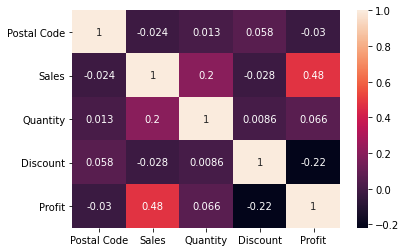

In [12]:
sns.heatmap(corelation,xticklabels=corelation.columns,yticklabels=corelation.columns,annot = True)

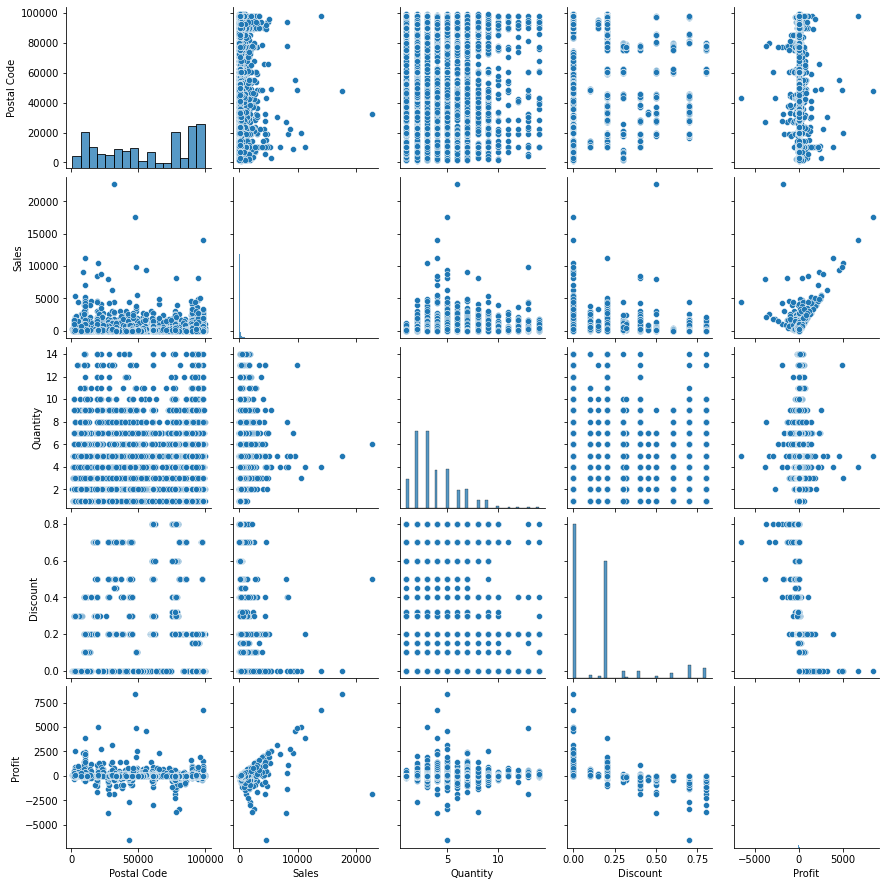

In [13]:
sns.pairplot(data)

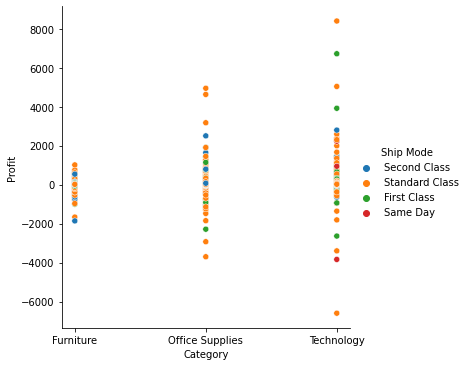

In [14]:
sns.relplot(x="Category",y="Profit",hue="Ship Mode",data=data)

**CATEGORY WISE ANALYSIS**

In [15]:
df = data.groupby("Category")["Profit"].sum()
df

Category
Furniture           18451.2728
Office Supplies    122490.8008
Technology         145454.9481
Name: Profit, dtype: float64

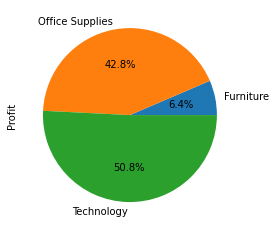

In [16]:
df.plot.pie(autopct="%.1f%%")

REGION WISE ANALYSIS

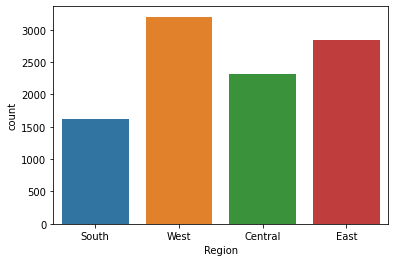

In [17]:
sns.countplot(x=data['Region'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


              Profit        Sales
Region                           
Central   39706.3625  501239.8908
East      91522.7800  678781.2400
South     46749.4303  391721.9050
West     108418.4489  725457.8245


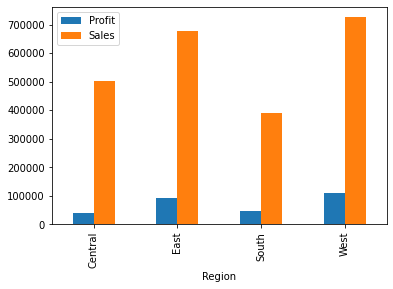

In [18]:
rw=data.groupby('Region')['Profit','Sales'].sum()
print(rw)
rw.plot.bar()

CATEGORY WISE ANALYSIS

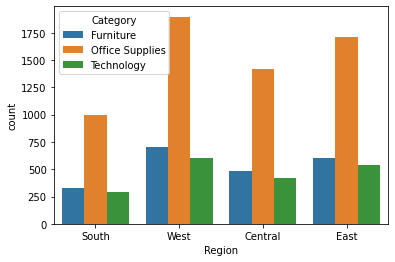

In [19]:
sns.countplot(x=data['Region'],hue=data['Category'])

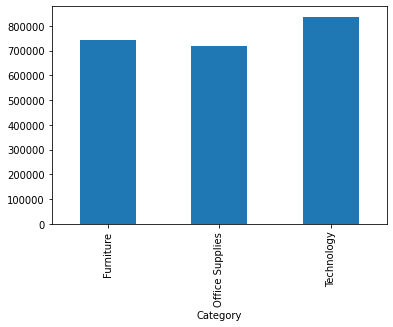

In [67]:
rw = data.groupby('Category')['Sales'].sum()
rw.plot.bar()

SALES WISE ANALYSIS

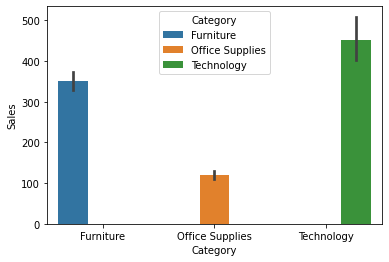

In [20]:
sns.barplot(x=data['Category'],y=data['Sales'],hue=data['Category'])

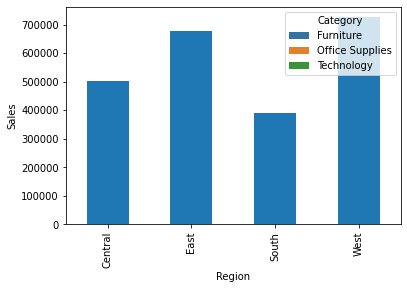

In [65]:

rw = data.groupby('Region')['Sales'].sum()
rw.plot.bar()


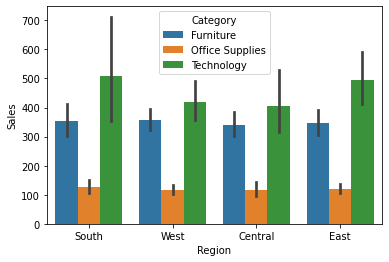

In [66]:
sns.barplot(x=data['Region'],y=data['Sales'],hue=data['Category'])

PROFIT WISE ANALYSIS

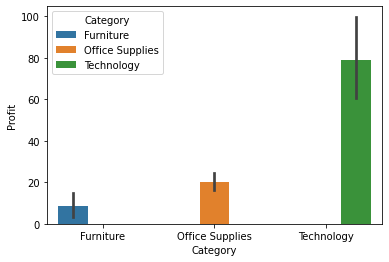

In [21]:
sns.barplot(x=data['Category'],y=data['Profit'],hue=data['Category'])

In [22]:
d2 = data.groupby("Sub-Category")["Profit"].sum()
d2

Sub-Category
Accessories    41936.6357
Appliances     18138.0054
Art             6527.7870
Binders        30221.7633
Bookcases      -3472.5560
Chairs         26590.1663
Copiers        55617.8249
Envelopes       6964.1767
Fasteners        949.5182
Furnishings    13059.1436
Labels          5546.2540
Machines        3384.7569
Paper          34053.5693
Phones         44515.7306
Storage        21278.8264
Supplies       -1189.0995
Tables        -17725.4811
Name: Profit, dtype: float64

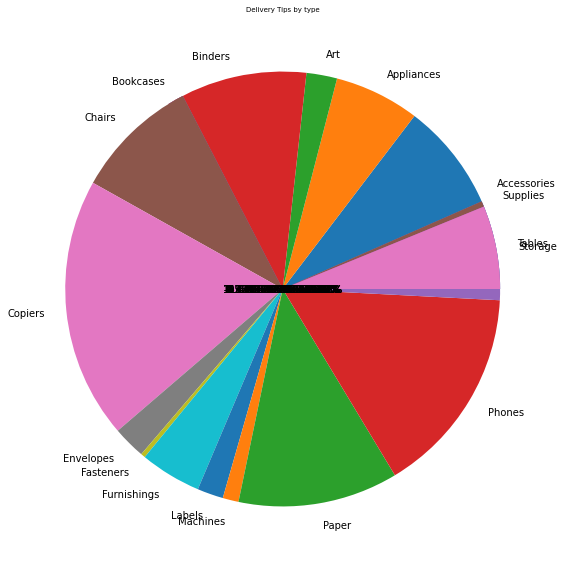

In [23]:
pie, ax = plt.subplots(figsize=[10,10])
labels = d2.keys()
plt.pie(x=d2, autopct="%.15f%%", labels=labels, pctdistance=0.0000001)
plt.title("Delivery Tips by type", fontsize=7)
pie.savefig("DeliveryPieChart.png")


CITY WISE ANALYSIS

In [24]:
s= data['City'].unique()
s
len(s)

531

In [25]:
t=data['City'].value_counts()
t

New York City    915
Los Angeles      747
Philadelphia     537
San Francisco    510
Seattle          428
                ... 
Cedar Rapids       1
Grand Island       1
Montebello         1
Conroe             1
Ontario            1
Name: City, Length: 531, dtype: int64

In [26]:
data['City'].value_counts().max()

915

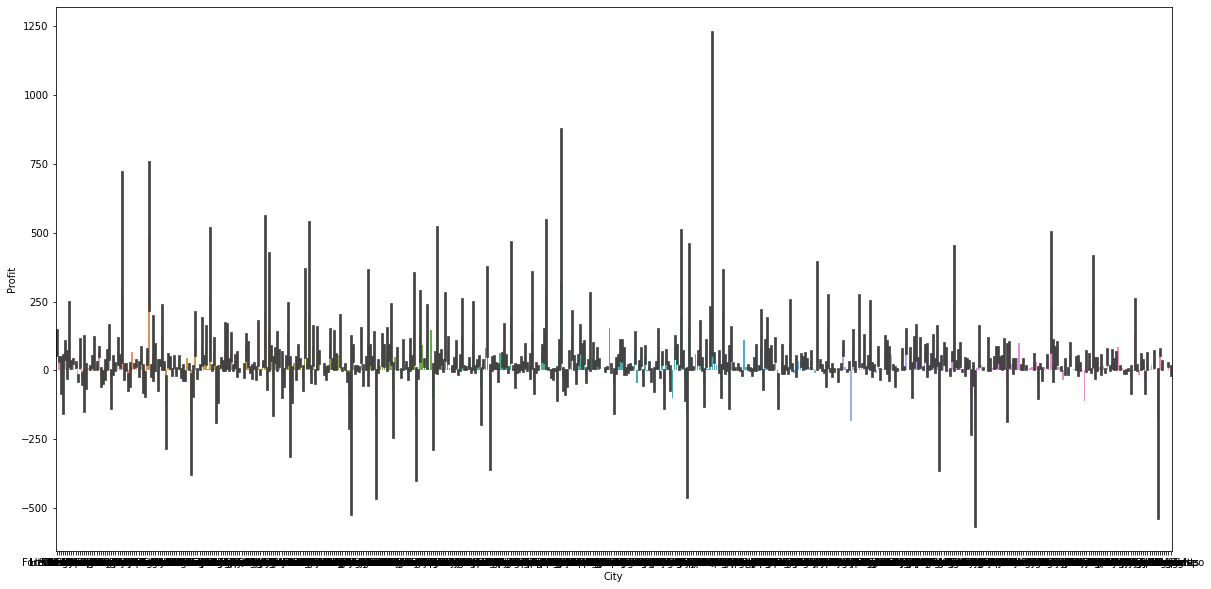

In [27]:
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x=data['City'],y=data['Profit'])